In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from statistics import stdev

In [4]:
from kelp_models import kelp_transit, bin

/tmp/ipykernel_10413/2795356017.py:12: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(f)


womp womp
womp womp
boowomp
boowomp


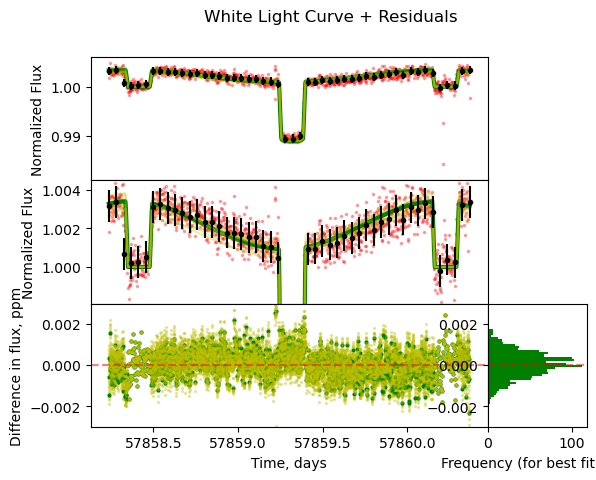

In [14]:
# Create figure and subplots
fig = plt.figure()
fig.suptitle('White Light Curve + Residuals')
grid = fig.add_gridspec(3, 2, hspace = 0.0, wspace = 0.0, width_ratios = [4, 1], height_ratios = [1, 1, 1])

ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0], sharex = ax1)
ax3 = fig.add_subplot(grid[2, 0], sharex = ax1)

# Scatter data points
with open('Bestfit_Poly5_v1_autoRun.pkl', 'rb') as f:
    data = pickle.load(f)
real_time = data[1]
real_flux = data[2] / data[4]
ax1.scatter(real_time, real_flux, color = 'r' , s = 2.5, alpha = 0.3, label = 'Raw Data')
ax2.scatter(real_time, real_flux, color = 'r' , s = 2.5, alpha = 0.3, label = 'Raw Data')


# Open csv file with parameters and plot each curve
params = pd.read_csv('MCMC Results - Sheet1.csv')
p_s, a_b, c_11 = params['Phase Shift'], params['Bond Albedo'], params['C11']

for i in range(len(p_s)):
    test_curve = kelp_transit(real_time, t0 = 56107.3541, per = 1.80988198, inc = 89.623, rp = 0.10852, ecc = 0, w = 51,
                            a = 4.08, q = [0.01, 0.01], fp = 1.0, t_secondary = 0, T_s=6305.79, rp_a = 0.0266,
                            limb_dark='quadratic', name='WASP-76b', channel=f"IRAC {2}",
                            hotspot_offset = np.radians(-3), phase_shift = p_s[i], A_B = a_b[i],  c11 = c_11[i])

    if i == 1 or i == 11:
        print('womp womp')
    elif i != 8:
        ax1.plot(test_curve[0], test_curve[1], label = 'Trial #' + str(1 + i), alpha = 0.3, color = 'y')
        ax2.plot(test_curve[0], test_curve[1], label = 'Trial #' + str(1 + i), alpha = 0.3, color = 'y')
    else:
        ax1.plot(test_curve[0], test_curve[1], label = 'Trial #' + str(1 + i) + ', Best Fit', color = 'g', linewidth = 3)
        ax2.plot(test_curve[0], test_curve[1], label = 'Trial #' + str(1 + i) + ', Best Fit', color = 'g', linewidth = 3)


# Bin data points + plot them on top of everything
bin_t = np.linspace(real_time[0], real_time[-1], 50)
bin_rf = bin(real_time, real_flux, 51)
rf_err = np.array([8.227736082037473e-4 for i in range(len(bin_rf))])         # Largest average residual that was used
ax1.errorbar(bin_t, bin_rf, yerr = rf_err, fmt = '.k',  label = 'Binned Data')
ax2.errorbar(bin_t, bin_rf, yerr = rf_err, fmt = '.k',  label = 'Binned Data')

ax1.set_ylabel('Normalized Flux')
ax1.set_ylim(0.981, 1.006)
ax2.set_ylabel('Normalized Flux')     # Zoomed in, same plot as ax[0]
ax2.set_ylim(0.9981, 1.0045)


# Plot residuals
best_fit_diff = None
for i in range(len(p_s)):
    test_curve = kelp_transit(real_time, t0=56107.3541, per=1.80988198, inc=89.623, rp=0.10852, ecc=0, w=51,
                              a=4.08, q=[0.01, 0.01], fp=1.0, t_secondary=0, T_s=6305.79, rp_a=0.0266,
                              limb_dark='quadratic', name='WASP-76b', channel=f"IRAC {2}",
                              hotspot_offset=np.radians(-3), phase_shift=p_s[i], A_B=a_b[i], c11=c_11[i])
    bin_f = bin(test_curve[0], test_curve[1], len(real_time) + 1)
    tt = np.linspace(test_curve[0][0], test_curve[0][-1], len(real_time))
    diff = real_flux - bin_f
    if i == 1 or i == 11:
        print('boowomp')
    elif i != 8:
        ax3.scatter(tt, diff, s = 2, label = 'Trial #' + str(1 + i), alpha = 0.3, color = 'y')
    else:
        ax3.scatter(tt, diff, s = 4, label = 'Trial #' + str(1 + i) + ', Best Fit', color = 'g')
        best_fit_diff = diff

ax3.axhline(y = 0, color = 'r', alpha = 0.5, ls = '--')
ax3.set_xlabel('Time, days')
ax3.set_ylabel('Difference in flux, ppm')
ax3.set_ylim(-0.003, 0.003)     # Zoomed in to ignore some outliers
plt.subplots_adjust(hspace = 0.0)


# Histogram the residuals
ax4 = fig.add_subplot(grid[2, 1], sharey = ax3)
ax4.hist(best_fit_diff, bins = 50, range = (-0.0026, 0.0026), orientation = 'horizontal', color = 'g')      # Set range to ignore some outliers
ax4.axhline(y = 0, color = 'r', alpha = 0.5, ls = '--')
ax4.set_xlabel('Frequency (for best fit only)')

plt.show()